In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import json

In [2]:
# path data
DATA_PATH = "../ESG/"
print(os.listdir(DATA_PATH))

['Book1.xlsx', 'data.csv', 'EUESGMANUFACTURER-LIGHT.zip', 'EUESGMANUFACTURER.zip', 'README.md']


In [3]:
# accessible markets
accessible_markets = pd.read_excel(DATA_PATH + "Book1.xlsx").to_numpy().flatten()

In [4]:
# import data
esg_light = "EUESGMANUFACTURER-LIGHT.zip"
esg_light_data = pd.DataFrame()

with zipfile.ZipFile(DATA_PATH + esg_light, "r") as z:
    for filename in z.namelist():
        if filename.endswith(".csv"):
            with z.open(filename) as f:
                esg_light_data = pd.read_csv(f)

print(esg_light_data.shape)
display(esg_light_data.head(3))

(30157, 22)


,swissValorNumber,ISIN,ISIN_BC,FISN,issuerSIXCompanyKey,LEI,companyDomicile,companyDomicileISO,companyLongName,fundManagerSIXCompanyKey,...,ESGValidFrom,ESGDeliveryDate,ESGActivity,ESGClassification,ESGFactor,ESGFactorProviderId,ESGFactorAmountLastYear,ESGFactorAmountLastYearUnit,ESGClassSymbol,ESGFactorDate
0,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00010_EET_Version,00010,1.11,NaN,NaN,NaN
1,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00060_EET_Data_Reporting_SFDR_Pre_Contractual,00060,NaN,NaN,ESG3-2 : No,NaN
2,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00070_EET_Data_Reporting_SFDR_Periodic,00070,NaN,NaN,ESG3-2 : No,NaN


# API

In [5]:
%load_ext autoreload
%autoreload 2

# import class for API
from financial_data_api import FinancialDataAPI
from financial_data_api import get_data, get_financial_ts, get_instrument_name, get_markets_correct_currency, get_accessible_markets_bc

In [6]:
print(os.listdir("../SIXWebAPI"))
dir = "../SIXWebAPI/CH52991-hackathon7"

['CH52991-hackathon1', 'CH52991-hackathon10', 'CH52991-hackathon2', 'CH52991-hackathon3', 'CH52991-hackathon4', 'CH52991-hackathon5', 'CH52991-hackathon6', 'CH52991-hackathon7', 'CH52991-hackathon8', 'CH52991-hackathon9', 'README.md']


In [7]:
# initialize class
fin_cursor = FinancialDataAPI(dir)

# time span
start_date = "2017-01-01"
end_date = "2024-03-12"

In [8]:
# # get correct bc
# instruments = ["CH0281016474"]

# # get financial data
# data = get_data(fin_cursor, instruments, accessible_markets, start_date, end_date)

# # characteristics of instrument
# print("characteristics of instrument:\n{}".format(data["lookup"]))

# # plot values
# columns = ["date", "close_price"]

# data_plot = get_financial_ts(data)
# data_plot.head(2)

In [9]:
# plt.figure(figsize=(12, 4))

# plt.plot(data_plot["date"], data_plot["close_price_CH0281016474"])

# plt.show()

# Get data

Goal: get an instrument based on its name

In [10]:
# get valors of ESG
valors = list(map(str, esg_light_data["ISIN"].unique()))
valors[:10]

['CH0281016474',
 'CH0281016656',
 'CH0281016938',
 'CH0281017506',
 'CH0281018538',
 'CH0281018728',
 'CH0294813131',
 'CH0294813149',
 'CH0297178714',
 'CH0297178755']

# ESG profile

get images/questions (something) to shortlist some ESG factors and output stock

# Performance portfolio

Compare ESG performance to reference index.

In [11]:
# # get ESG instrument
# data_esg = get_data(
#     fin_cursor, ["CH0297178755"], accessible_markets, start_date, end_date
# )
# data_esg_ts = get_financial_ts(data_esg)

In [12]:
# # get reference index
# data_reference = get_data(
#     fin_cursor, ["CH0294813131"], accessible_markets, start_date, end_date
# )
# data_reference_ts = get_financial_ts(data_reference)

In [13]:
# get clean esg data ratings
from data_pure import get_clean_data_esg

esg_ratings = get_clean_data_esg(esg_light_data.copy(deep=True))
display(esg_ratings.head())

,ISIN,ProductType,Environment,Social,Governance
0,CH0281016474,8.0,0.0,0.2,0.0
1,CH0281016656,8.0,0.0,0.2,0.0
2,CH0281016938,8.0,0.0,0.2,0.0
3,CH0281017506,8.0,0.0,0.2,0.0
4,CH0281018538,8.0,0.0,0.2,0.0


In [52]:
unique_isin =esg_light_data["ISIN"].unique()
for isin in unique_isin:
    if esg_light_data[esg_light_data["ISIN"] == isin][""]

,swissValorNumber,ISIN,ISIN_BC,FISN,issuerSIXCompanyKey,LEI,companyDomicile,companyDomicileISO,companyLongName,fundManagerSIXCompanyKey,...,ESGValidFrom,ESGDeliveryDate,ESGActivity,ESGClassification,ESGFactor,ESGFactorProviderId,ESGFactorAmountLastYear,ESGFactorAmountLastYearUnit,ESGClassSymbol,ESGFactorDate
30102,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",EET Data Set Information,00010_EET_Version,00010,1.11,NaN,NaN,NaN
30103,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",EET Data Set Information,00060_EET_Data_Reporting_SFDR_Pre_Contractual,00060,NaN,NaN,ESG3-1 : Yes,NaN
30104,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",EET Data Set Information,00070_EET_Data_Reporting_SFDR_Periodic,00070,NaN,NaN,ESG3-1 : Yes,NaN
30105,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",EET Data Set Information,00080_EET_Data_Reporting_SFDR_Entity_Level,00080,NaN,NaN,ESG3-1 : Yes,NaN
30106,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",EET Data Set Information,00090_EET_Data_Reporting_MiFID,00090,NaN,NaN,ESG3-1 : Yes,NaN
30107,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",EET Data Set Information,00100_EET_Data_Reporting_IDD,00100,NaN,NaN,ESG3-1 : Yes,NaN
30108,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",Main criterias used for a first screening of E...,20040_Financial_Instrument_SFDR_Product_Type,20040,8.00,1 : Nominal,NaN,NaN
30109,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",Main criterias used for a first screening of E...,20060-J_Financial_Instrument_ESG_Label_Or_Stan...,J,NaN,NaN,NaN,NaN
30110,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,"Data Set, Manufacturer and Product information",Main criterias used for a first screening of E...,20100_Financial_Instrument_Does_This_Product_C...,20100,NaN,NaN,ESG3-1 : Yes,NaN
30111,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,Art. 8 & Art. 9 Product Specific Information,MiFID/IDD Target Market - Manufacturer angle (...,20590_Does_This_Financial_Instrument_Consider_...,20590,NaN,NaN,ESG3-1 : Yes,NaN


In [49]:
esg_light_data

,swissValorNumber,ISIN,ISIN_BC,FISN,issuerSIXCompanyKey,LEI,companyDomicile,companyDomicileISO,companyLongName,fundManagerSIXCompanyKey,...,ESGValidFrom,ESGDeliveryDate,ESGActivity,ESGClassification,ESGFactor,ESGFactorProviderId,ESGFactorAmountLastYear,ESGFactorAmountLastYearUnit,ESGClassSymbol,ESGFactorDate
0,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00010_EET_Version,00010,1.11,NaN,NaN,NaN
1,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00060_EET_Data_Reporting_SFDR_Pre_Contractual,00060,NaN,NaN,ESG3-2 : No,NaN
2,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00070_EET_Data_Reporting_SFDR_Periodic,00070,NaN,NaN,ESG3-2 : No,NaN
3,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00080_EET_Data_Reporting_SFDR_Entity_Level,00080,NaN,NaN,ESG3-2 : No,NaN
4,28101647,CH0281016474,CH0281016474_393,Von Fd PenInYd/Ut Cl-A CHF,693053,5493005ZZWAG5GH0G736,Switzerland,CH,Vontobel Fund (CH) - Pension Invest Yield,552303.0,...,2024-02-01,2024-02-02,"Data Set, Manufacturer and Product information",EET Data Set Information,00090_EET_Data_Reporting_MiFID,00090,NaN,NaN,ESG3-2 : No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30152,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,PAI Real Estate,Energy efficiency,31340_Exposure_To_Energy-inefficient_Real_Esta...,31340,NaN,NaN,ESG3-2 : No,NaN
30153,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-13,Country Specific Data,German MiFID Market,60440_Financial_Instrument_Sustainable_Indicat...,60440,NaN,NaN,ESG3-39 : FI according to Article 2 No. 7b & 7c,NaN
30154,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-07,NaN,MiFID Sustainability Preference Flag,MiFID Sustainability Preference Flag - A,60440,NaN,NaN,ESG3-2 : No,NaN
30155,1003829,AT0000820139,AT0000820139_3313,RAIFF KAG/RAIFF MEG ESG AKT R A,52529,529900WQ21XZ52DAAC20,Austria,AT,Raiffeisen-MegaTrends-Aktien,128046.0,...,2024-02-29,2024-03-07,NaN,MiFID Sustainability Preference Flag,MiFID Sustainability Preference Flag - B,60440,NaN,NaN,ESG3-1 : Yes,NaN


In [68]:
import time

# get available markets of SIX and markets in which instrument is
esg_instruments = esg_ratings["ISIN"].unique()
markets_available = []

for k in range(len(esg_instruments)):
    try:
        markets_available.append(
            get_accessible_markets_bc(
                fin_cursor, "ISIN", esg_instruments[k : k + 5], accessible_markets
            )
        )
        time.sleep(0.2)
    except:
        markets_available.append(
            get_accessible_markets_bc(
                fin_cursor, "ISIN", esg_instruments[k:], accessible_markets
            )
        )

APIError: An error occurred during the API request.

In [71]:
markets_available

[[[200, 2020, 2021, 3089, 3233, 3520],
  [2020, 2021, 3089, 3233, 3520],
  [254],
  [200, 2020, 2021, 3089, 3233, 3520],
  [2020, 2021, 3089, 3233, 3520]],
 [[2020, 2021, 3089, 3233, 3520],
  [254],
  [200, 2020, 2021, 3089, 3233, 3520],
  [2020, 2021, 3089, 3233, 3520],
  [254]],
 [[254],
  [200, 2020, 2021, 3089, 3233, 3520],
  [2020, 2021, 3089, 3233, 3520],
  [254],
  [200, 2020, 2021, 3089, 3233, 3520]],
 [[200, 2020, 2021, 3089, 3233, 3520],
  [2020, 2021, 3089, 3233, 3520],
  [254],
  [200, 2020, 2021, 3089, 3233, 3520],
  [200, 2020, 2021, 3089, 3233, 3520]],
 [[2020, 2021, 3089, 3233, 3520],
  [254],
  [200, 2020, 2021, 3089, 3233, 3520],
  [200, 2020, 2021, 3089, 3233, 3520],
  [200, 205, 2020, 2021, 3233]],
 [[254],
  [200, 2020, 2021, 3089, 3233, 3520],
  [200, 2020, 2021, 3089, 3233, 3520],
  [200, 205, 2020, 2021, 3233],
  [200, 205, 2020, 2021, 3233]],
 [[200, 2020, 2021, 3089, 3233, 3520],
  [200, 2020, 2021, 3089, 3233, 3520],
  [200, 205, 2020, 2021, 3233],
  [200, 20

In [79]:
instruments

544

In [77]:
# keep only market in given currency
instruments = []

for k in range(len(markets_available)):
    try:
        instruments.append(
            get_markets_correct_currency(
                fin_cursor, "ISIN_BC", esg_instruments[k : k + 5], markets_available[k]
            )
        )
        time.sleep(0.3)
    except:
        instruments.append(
            get_markets_correct_currency(
                fin_cursor, "ISIN_BC", esg_instruments[k:], markets_available[k]
            )
        )
        time.sleep(0.3)

APIError: An error occurred during the API request.

In [90]:
instruments_all = [item for sublist in instruments for item in sublist]
instruments_all = (
    pd.DataFrame(list(map(lambda l: l.split("_"), instruments_all)))
    .drop_duplicates(subset=[0])
    .to_numpy()
)
instruments_all = list(map(lambda l: "_".join(l), instruments_all))
instruments_all

['CH0281016474_200',
 'CH0281017506_3233',
 'CH0281018538_3233',
 'CH0281016656_2020',
 'CH0294813131_3520',
 'CH0281016938_254',
 'CH0294813149_3520',
 'CH0297178714_3233',
 'CH0281018728_254',
 'CH0297178755_3233',
 'CH0311188863_3520',
 'CH0297178771_3233',
 'CH0311189556_3520',
 'CH0311189580_3520',
 'CH0381682621_3520',
 'CH0481373295_3233',
 'CH0481373311_3233',
 'CH0487357136_3520',
 'CH0487357144_3520',
 'CH0531747381_3520',
 'CH0531753587_3520',
 'CH0487357052_200',
 'CH0578494418_3520',
 'CH0578494426_3520',
 'CH0584288531_3520',
 'CH0530164190_200',
 'CH0584288564_3520',
 'CH0584288580_3520',
 'CH1189223345_3233',
 'CH1240611579_3520',
 'CH1240611561_200',
 'BE0170210729_200',
 'ES0174403032_200',
 'ES0111187037_200',
 'ES0174403008_200',
 'ES0174403016_200',
 'ES0174403057_200',
 'FR0007475843_200',
 'FR0000431538_200',
 'FR0007479365_200',
 'FR0000299240_200',
 'FR0000299364_200',
 'FR0000293714_200',
 'FR0007371810_200',
 'FR0000098683_200',
 'GB0031616815_200',
 'GB00316

In [91]:
len(instruments_all)

269

In [93]:
# get data for each instrument
data_esg = fin_cursor.endOfDayHistory("ISIN_BC", instruments_all, start_date, end_date) # get_data(fin_cursor, instruments, start_date, end_date)
data_esg

{'data': {'listings': [{'requestedId': 'CH0281016474_200',
    'requestedScheme': 'ISIN_BC',
    'lookupStatus': 'FOUND',
    'lookup': {'listingShortName': 'Von Fd PenInYd -A-',
     'marketShortName': 'ESTV',
     'listingCurrency': 'CHF',
     'listingStatus': 'NOT_LISTED'},
    'marketData': {'endOfDayHistory': [{'sessionDate': '2017-12-29',
       'close': 104.23,
       'last': 104.23,
       'closeYear': 104.23},
      {'sessionDate': '2018-12-31',
       'close': 99.39,
       'last': 99.39,
       'closeYear': 99.39},
      {'sessionDate': '2019-12-31',
       'close': 107.29,
       'last': 107.29,
       'closeYear': 107.29},
      {'sessionDate': '2020-12-31',
       'close': 108.07,
       'last': 108.07,
       'closeYear': 108.07},
      {'sessionDate': '2021-12-31',
       'close': 111.38,
       'last': 111.38,
       'closeYear': 111.38},
      {'sessionDate': '2022-12-31',
       'close': 93.49,
       'last': 93.49,
       'closeYear': 93.49},
      {'sessionDate': 

In [137]:
inst_id = list(map(lambda l: l["requestedId"].split("_")[0], data_esg["data"]["listings"]))
inst_name = list(map(lambda l: get_instrument_name(l), data_esg["data"]["listings"]))
inst_corresp = dict(zip(inst_name, inst_id))
inst_corresp

{'Von Fd PenInYd -A-': 'CH0281016474',
 'VON FD PENINBAL -A-': 'CH0281017506',
 'VONFD PENINBAL -NV-': 'CH0281018538',
 'Von Fd PenInYd -NV-': 'CH0281016656',
 'VON FD PENINYD -I-': 'CH0294813131',
 'VON FD PENINYD BV': 'CH0281016938',
 'VON FD PENINBAL -I-': 'CH0294813149',
 'JB EQEDEL CHF A': 'CH0297178714',
 'VON FD PENINBAL BV': 'CH0281018728',
 'JB EQEDEL CHF B': 'CH0297178755',
 'VESSWEMF -A-': 'CH0311188863',
 'JB EQEDEL CHF K': 'CH0297178771',
 'VESSWEMF -S-': 'CH0311189556',
 'VesSwEMF -AI-': 'CH0311189580',
 'VESSWEMF -AN-': 'CH0381682621',
 'JB EQEDEL CHF M': 'CH0481373295',
 'JB EQEDEL CHF Ma': 'CH0481373311',
 'VAR(CH)3ADEUSA -V-': 'CH0530164190',
 'VAR(CH)3ADES -G-': 'CH0487357144',
 'VAR3ADES -VE CHF-': 'CH0531747381',
 'VAR3ADEUSA -VE CHF-': 'CH0531753587',
 'VAR(CH)3ADEUSA -G-': 'CH0487357052',
 'VONFDCH-PEINYIYV': 'CH0578494418',
 'VONFDCH-PEINBALYV': 'CH0578494426',
 'VON FD PENINBAL -S-': 'CH0584288531',
 'VONFD PENINBAL -AI-': 'CH0584288564',
 'VONFD PENINBAL -AN-'

In [106]:
oo = get_financial_ts(data_esg["data"]["listings"])

In [146]:
data_esg_ts = pd.DataFrame(oo).T.rename(
    columns={0: "date", 1: "close_price", 2: "instrument_name"}
)
data_esg_ts.head()

,date,close_price,instrument_name
0,2017-12-29,104.23,Von Fd PenInYd -A-
1,2018-12-31,99.39,Von Fd PenInYd -A-
2,2019-12-31,107.29,Von Fd PenInYd -A-
3,2020-12-31,108.07,Von Fd PenInYd -A-
4,2021-12-31,111.38,Von Fd PenInYd -A-


In [147]:
data_esg_ts["instrument_isin"] = data_esg_ts["instrument_name"].apply(
    lambda inst: inst_corresp[inst] if inst != "1" else None
)
data_esg_ts.head()

,date,close_price,instrument_name,instrument_isin
0,2017-12-29,104.23,Von Fd PenInYd -A-,CH0281016474
1,2018-12-31,99.39,Von Fd PenInYd -A-,CH0281016474
2,2019-12-31,107.29,Von Fd PenInYd -A-,CH0281016474
3,2020-12-31,108.07,Von Fd PenInYd -A-,CH0281016474
4,2021-12-31,111.38,Von Fd PenInYd -A-,CH0281016474


In [149]:
data_esg_ts.dropna(inplace=True)

In [150]:
export = False
if export:
    data_esg_ts.to_csv(DATA_PATH + "data.csv")

In [14]:
from data_pure import get_clean_data_esg


esg_criterion = get_clean_data_esg(esg_light_data)
esg_criterion.head()

,ISIN,ProductType,Environment,Social,Governance
0,CH0281016474,8.0,0.0,0.2,0.0
1,CH0281016656,8.0,0.0,0.2,0.0
2,CH0281016938,8.0,0.0,0.2,0.0
3,CH0281017506,8.0,0.0,0.2,0.0
4,CH0281018538,8.0,0.0,0.2,0.0


In [15]:
df = pd.read_csv(DATA_PATH + "data.csv").drop(columns=["Unnamed: 0"])
print(df.shape)
df.head()

(23112, 4)


,date,close_price,instrument_name,instrument_isin
0,2017-12-29,104.23,Von Fd PenInYd -A-,CH0281016474
1,2018-12-31,99.39,Von Fd PenInYd -A-,CH0281016474
2,2019-12-31,107.29,Von Fd PenInYd -A-,CH0281016474
3,2020-12-31,108.07,Von Fd PenInYd -A-,CH0281016474
4,2021-12-31,111.38,Von Fd PenInYd -A-,CH0281016474


In [16]:
df = pd.merge(df, esg_criterion, left_on="instrument_isin", right_on="ISIN", how="left")
df.head()

,date,close_price,instrument_name,instrument_isin,ISIN,ProductType,Environment,Social,Governance
0,2017-12-29,104.23,Von Fd PenInYd -A-,CH0281016474,CH0281016474,8.0,0.0,0.2,0.0
1,2018-12-31,99.39,Von Fd PenInYd -A-,CH0281016474,CH0281016474,8.0,0.0,0.2,0.0
2,2019-12-31,107.29,Von Fd PenInYd -A-,CH0281016474,CH0281016474,8.0,0.0,0.2,0.0
3,2020-12-31,108.07,Von Fd PenInYd -A-,CH0281016474,CH0281016474,8.0,0.0,0.2,0.0
4,2021-12-31,111.38,Von Fd PenInYd -A-,CH0281016474,CH0281016474,8.0,0.0,0.2,0.0


In [17]:
# select ESG criteria and plot
non_esg_funds = df[
    (df["ProductType"] <= 7) & (df["Environment"] <= 0.5) & (df["Social"] <= 0.5)
]
non_esg_funds["instrument_isin"].unique()

array(['FR0000299364', 'GB0031616815', 'GB0031616708', 'GB0030926736',
       'GB0030926843', 'GB0030927700', 'GB0030932676', 'GB0030932783',
       'GB0030932452', 'GB0030932346', 'GB0031111700', 'GB0031285678',
       'GB0030939556', 'GB0031286080', 'GB0031286197', 'GB0031285785',
       'GB0031111817', 'GB0031289217', 'GB0031289100', 'GB0031288912',
       'GB0031289092', 'GB0030927817', 'GB0030939440', 'GB0030937840',
       'GB0030938038', 'GB0030938368', 'GB0030938475', 'GB0031110397',
       'GB0031957219', 'GB0031957102', 'GB0031958738', 'GB0031958621',
       'GB0031960585', 'CH0311188863', 'CH0311189556', 'CH0311189580',
       'CH0381682621'], dtype=object)

In [43]:
non_esg_funds[
    [
        "date",
        "close_price",
        "instrument_isin",
        # "ProductType",
        # "Environment",
        # "Social",
        # "Governance",
    ]
].set_index("date").pivot()

TypeError: DataFrame.pivot() missing 1 required keyword-only argument: 'columns'

In [18]:
# rescale to base 100
non_esg_funds_gb = (
    non_esg_funds.set_index("date").groupby(["instrument_isin"])[["close_price"]]
    .apply(lambda x: x)
    .sort_values(["instrument_isin", "date"])
)

non_esg_funds_gb.head()

close_price
instrument_isin date                   
CH0311188863    2017-12-29       190.46
                2018-12-31       181.32
                2019-12-31       249.93
                2020-12-31       338.43
                2021-02-04        83.58

In [44]:
non_esg_data = pd.DataFrame(columns=["instrument_isin", "close_price"])
for fund in non_esg_funds_gb.index.get_level_values(0).unique():
    temp = non_esg_funds_gb.loc[fund] / non_esg_funds_gb.loc[fund].iloc[0] * 100
    temp["instrument_isin"] = fund
    temp["log_return"] = np.log(temp["close_price"]).diff()
    non_esg_data = pd.concat(
        (
            non_esg_data,
            temp,
        ),
        axis=0,
    )

# non_esg_data =
non_esg_data = non_esg_data.reset_index().rename(
    columns={"index": "date"}
)  # .groupby("instrument_isin").apply(lambda x: x)
non_esg_data.head()

C:\Users\marti\AppData\Local\Temp\ipykernel_28524\2714334487.py:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,date,instrument_isin,close_price,log_return
0,2017-12-29,CH0311188863,100.000000,NaN
1,2018-12-31,CH0311188863,95.201092,-0.049179
2,2019-12-31,CH0311188863,131.224404,0.320917
3,2020-12-31,CH0311188863,177.690854,0.303136
4,2021-02-04,CH0311188863,43.883230,-1.398513


In [45]:
np.random.seed(1)
random_non_esg_funds = np.random.choice(non_esg_data["instrument_isin"].unique(), size=3)
random_non_esg_funds

array(['GB0030932783', 'GB0030927817', 'GB0030932346'], dtype=object)

In [ ]:
non_esg_data[non_esg_data[""]]

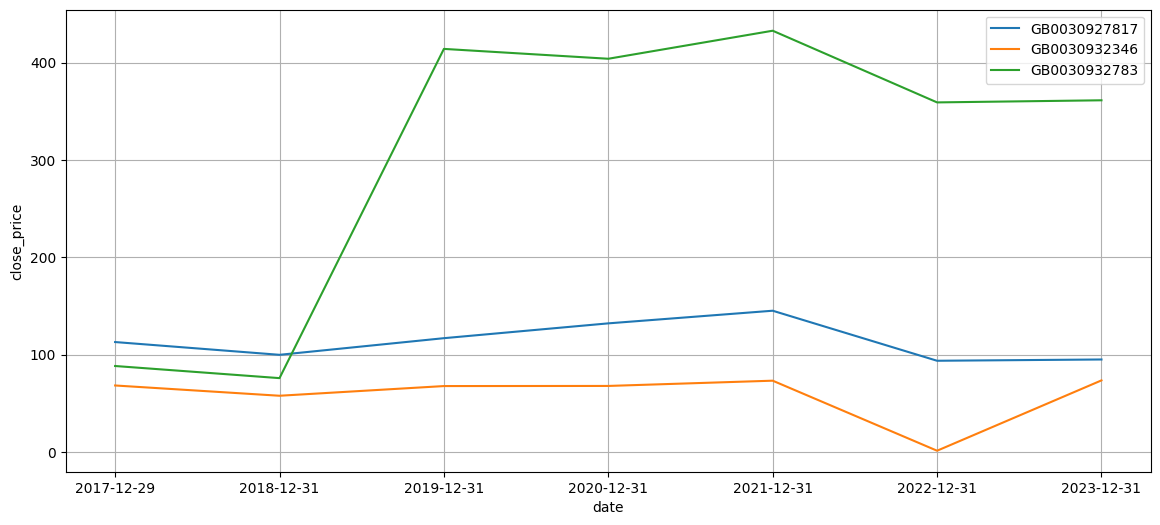

In [46]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=non_esg_data[np.isin(non_esg_data["instrument_isin"], random_non_esg_funds)],
    x="date",
    y="close_price",
    hue="instrument_isin",
    errorbar=None
)

plt.legend(loc="best")
plt.grid(True)
plt.show()

In [22]:
# esg funds
esg_funds = df[(df["ProductType"] >= 8) & (df["Environment"] >= 0.6)]
esg_funds.head()

,date,close_price,instrument_name,instrument_isin,ISIN,ProductType,Environment,Social,Governance
11321,2020-12-31,1756.220000,Sab Inter Euro-Base,ES0174403032,ES0174403032,8.0,0.625,1.0,0.0
11322,2021-12-31,2220.573065,Sab Inter Euro-Base,ES0174403032,ES0174403032,8.0,0.625,1.0,0.0
11323,2022-12-31,14.836338,Sab Inter Euro-Base,ES0174403032,ES0174403032,8.0,0.625,1.0,0.0
11324,2023-12-31,18.518322,SABAD PRUDENTE-PREM,ES0111187037,ES0111187037,8.0,0.625,1.0,0.0
11325,2017-12-29,40.370000,SABAD PRUDENTE-PREM,ES0111187037,ES0111187037,8.0,0.625,1.0,0.0


In [23]:
# rescale to base 100
esg_funds_gb = (
    esg_funds.set_index("date")
    .groupby(["instrument_isin"])[["close_price"]]
    .apply(lambda x: x)
    .sort_values(["instrument_isin", "date"])
)

esg_funds_gb.head()

close_price
instrument_isin date                   
ES0111187037    2017-12-29        40.37
                2017-12-29       134.22
                2018-12-31        30.58
                2018-12-31       112.81
                2019-12-31       134.62

In [24]:
esg_data = pd.DataFrame(columns=["instrument_isin", "close_price"])
for fund in esg_funds_gb.index.get_level_values(0).unique():
    temp = esg_funds_gb.loc[fund] / esg_funds_gb.loc[fund].iloc[0] * 100
    temp["instrument_isin"] = fund
    esg_data = pd.concat(
        (
            esg_data,
            temp,
        ),
        axis=0,
    )

esg_data = esg_data.reset_index().rename(columns={"index": "date"})
esg_data.head()

C:\Users\marti\AppData\Local\Temp\ipykernel_28524\1997579807.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  esg_data = pd.concat(


,date,instrument_isin,close_price
0,2017-12-29,ES0111187037,100.000000
1,2017-12-29,ES0111187037,332.474610
2,2018-12-31,ES0111187037,75.749319
3,2018-12-31,ES0111187037,279.440178
4,2019-12-31,ES0111187037,333.465445


In [25]:
np.random.seed(1)
random_esg_funds = np.random.choice(esg_data["instrument_isin"].unique(), size=3)
random_esg_funds

array(['FR0000293714', 'ES0174403032', 'ES0174403057'], dtype=object)

In [48]:
esg_funds[esg_funds["instrument_isin"] == "FR0000293714"]

,date,close_price,instrument_name,instrument_isin,ISIN,ProductType,Environment,Social,Governance
11361,2022-12-31,1602.502982,Ostrum SRI CP RC,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11362,2023-12-31,1602.523890,Ostrum SRI CP RC,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11363,2017-12-29,1.680000,Ostrum SRI CP RC,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11364,2018-12-31,1.650000,Ostrum SRI CP RC,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11365,2019-12-31,1.750000,Ostrum SRI CP RC,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11366,2020-12-31,1.790000,Ostrum SRI CP RC,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11367,2021-12-31,1.748348,Ostrum SRI CP RC,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11947,2023-12-31,33.353917,Bar Intl Aus USD-A-,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11948,2017-12-29,117.150000,Bar Intl Aus USD-A-,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0
11949,2018-12-31,103.310000,Bar Intl Aus USD-A-,FR0000293714,FR0000293714,8.0,0.625,1.0,1.0


In [47]:
esg_data[esg_data["instrument_isin"] == "FR0000293714"]

,date,instrument_isin,close_price
1168,2017-12-29,FR0000293714,100.000000
1169,2017-12-29,FR0000293714,6973.214286
1170,2018-12-31,FR0000293714,98.214286
1171,2018-12-31,FR0000293714,6149.404762
1172,2019-12-31,FR0000293714,104.166667
1173,2019-12-31,FR0000293714,6982.142857
1174,2020-12-31,FR0000293714,106.547619
1175,2020-12-31,FR0000293714,6979.166667
1176,2021-12-31,FR0000293714,104.068337
1177,2021-12-31,FR0000293714,7989.456607


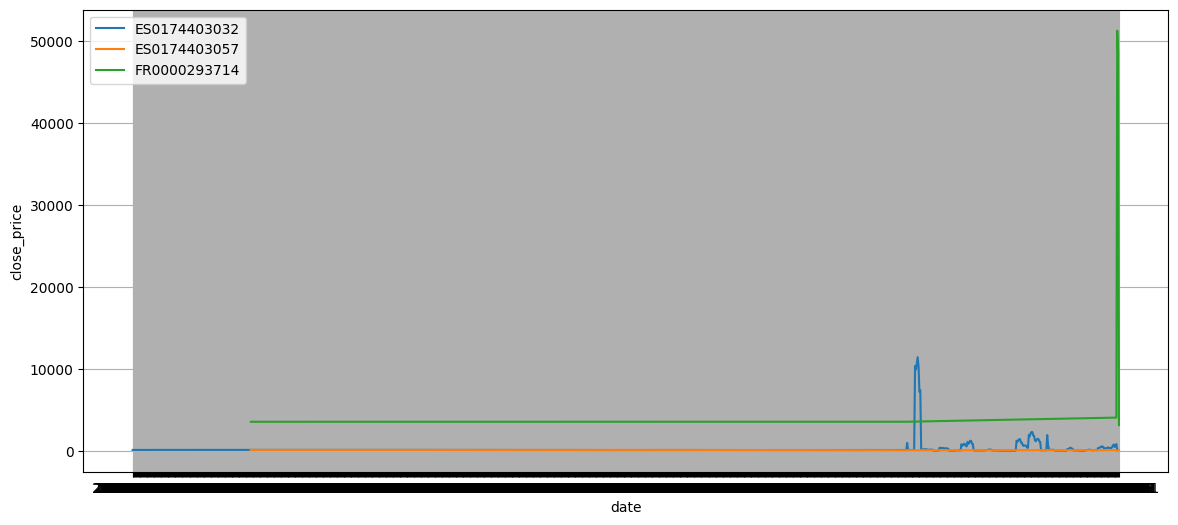

In [26]:
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.lineplot(
    data=esg_data[np.isin(esg_data["instrument_isin"], random_esg_funds)],
    x="date",
    y="close_price",
    hue="instrument_isin",
    errorbar=None
)

plt.legend(loc="best")
plt.grid(True)
plt.show()

---------------------------------------------------------------------------------------------------------------------------

In [27]:
import dash

# import dash_core_components as dcc
from dash import dcc
import dash_html_components as html
import plotly.graph_objs as go


app = dash.Dash(__name__)

app.layout = html.Div(
    [
        dcc.Dropdown(
            id="dropdown",
            options=[
                {"label": i, "value": i}
                for i in data_esg_ts["instrument_name"].unique()
            ],
        ),
        dcc.Graph(
            id="graph",
        ),
    ]
)


@app.callback(
    dash.dependencies.Output("graph", "figure"),
    [dash.dependencies.Input("dropdown", "value")],
)
def update_graph(value):
    return {
        "data": [
            go.Scatter(
                x=data_esg_ts[data_esg_ts["instrument_name"] == "Von Fd PenInYd -A-"][
                    "date"
                ],
                y=data_esg_ts[data_esg_ts["instrument_name"] == "Von Fd PenInYd -A-"][
                    "close_price"
                ],
                name="Reference index",
            ),
            go.Scatter(
                x=data_esg_ts[data_esg_ts["instrument_name"] == value]["date"],
                y=data_esg_ts[data_esg_ts["instrument_name"] == value]["close_price"],
                name=f"{value}",
            ),
        ],
        "layout": go.Layout(
            xaxis={"title": "Index"}, yaxis={"title": value}, title="Line Plots"
        ),
    }


if __name__ == "__main__":
    app.run_server(debug=True)

C:\Users\marti\AppData\Local\Temp\ipykernel_28524\2711171422.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


NameError: name 'data_esg_ts' is not defined

In [ ]:
import dash

# import dash_core_components as dcc
from dash import dcc
import dash_html_components as html
import plotly.graph_objs as go


app = dash.Dash(__name__)

app.layout = html.Div(
    [
        dcc.Dropdown(
            id="dropdown",
            options=[
                {"label": i, "value": i}
                for i in data_esg_ts["instrument_name"].unique()
            ],
        ),
        dcc.Graph(
            id="graph",
        ),
    ]
)


@app.callback(
    dash.dependencies.Output("graph", "figure"),
    [dash.dependencies.Input("dropdown", "value")],
)
def update_graph(selected_values):
    traces = []
    traces.append(
        go.Scatter(
                x=data_esg_ts[data_esg_ts["instrument_name"] == "Von Fd PenInYd -A-"][
                    "date"
                ],
                y=data_esg_ts[data_esg_ts["instrument_name"] == "Von Fd PenInYd -A-"][
                    "close_price"
                ],
                name="Reference index",
            )
    )
    for value in selected_values:
        traces.append(
            go.Scatter(
                x=data_esg_ts[data_esg_ts["instrument_name"] == value]["date"],
                y=data_esg_ts[data_esg_ts["instrument_name"] == value]["close_price"],
                name=f"{value}",
            )
        )
    return {'data': traces, 'layout': go.Layout(title='Line Plots')}


if __name__ == "__main__":
    app.run_server(debug=True)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[63], line 44, in update_graph(selected_values=None)
     32 traces = []
     33 traces.append(
     34     go.Scatter(
     35             x=data_esg_ts[data_esg_ts["instrument_name"] == "Von Fd PenInYd -A-"][
   (...)
     42         )
     43 )
---> 44 for value in selected_values:
        selected_values = None
     45     traces.append(
     46         go.Scatter(
     47             x=data_esg_ts[data_esg_ts["instrument_name"] == value]["date"],
   (...)
     50         )
     51     )
     52 return {'data': traces, 'layout': go.Layout(title='Line Plots')}

TypeError: 'NoneType' object is not iterable

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[63], line 44, in update_graph(selected_values=None)
     32 trac

In [ ]:
# from dash import Dash, html, dcc
# from dash.dependencies import Output, Input
# import plotly.express as px
# import plotly.graph_objects as go

# app = Dash(__name__)

# app.layout = html.Div(
#     [
#         html.H1(children="ESG fund performance", style={"textAlign": "center"}),
#         dcc.Dropdown(
#             options=[
#                 {"label": i, "value": i}
#                 for i in data_esg_ts["instrument_name"].unique()
#             ],
#             value="Von Fd PenInYd -A-", # (CH0281016474)
#             id="dropdown-selection",
#         ),
#         dcc.Graph(id="graph-content"),
#     ],
#     style={"width": "100%"},
# )


# @app.callback(Output("graph-content", "figure"), Input("dropdown-selection", "value"))
# def update_graph(value):
#     # reference index
#     constant_trace = go.Scatter(
#         x=data_esg_ts["date"],
#         y=data_esg_ts["close_price"],
#         mode="lines",
#         name=data_esg_ts["instrument_name"].values[0],
#         line={"dash": "dash"},
#     )

#     # index esg
#     data_esg_isin = data_esg_ts[data_esg_ts["instrument_name"] == value]
#     changing_trace = go.Scatter(
#         x=data_esg_isin["date"],
#         y=data_esg_isin["close_price"],
#         mode="lines",
#         name=value,
#         # hovertemplate='Date: %{x}<br>Price: %{y}<br>ESG rating: %{text}',
#         # text=data_esg_isin["esg_rating"],
#     )

#     return {
#         "data": [changing_trace, constant_trace],
#         "layout": go.Layout(
#             xaxis={"title": "date"}, yaxis={"title": "close price [CHF]"}, autosize=True
#         ),
#     }


# if __name__ == "__main__":
#     app.run_server(debug=True)

# Interactive plots